In [2]:
# %%writefile pca_model.py

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

input_data = pd.read_csv('/home/llevin/Desktop/capstone2/cleaned_data/input_data_vF3.csv')

num_cols = input_data.select_dtypes(include=['int64','float64']).columns
num_cols = [col for col in num_cols if col not in ['result','full_time_home_goals','full_time_away_goals',
                                                   'half_time_home_goals','half_time_away_goals','half_time_results'
                                                   ,'at_Emirates Stadium','at_Boleyn Ground','at_King Power Stadium'
                                                   ,'at_Old Trafford','at_Loftus Road','at_Britannia Stadium'
                                                   ,'at_The Hawthorns','at_Anfield','at_Sports Direct Arena'
                                                   ,'at_Turf Moor','at_Villa Park','at_Stamford Bridge','at_Selhurst Park'
                                                   ,'at_Goodison Park',"at_St Mary's Stadium",'at_Liberty Stadium',
                                                   'at_KC Stadium','at_Stadium of Light','at_White Hart Lane'
                                                   ,'at_Etihad Stadium','at_Carrow Road','at_Molineux Stadium',
                                                   'at_Cardiff City Stadium','at_Craven Cottage','at_Madejski Stadium']]
pca_cols = [col for col in num_cols if col not in ['home_team_api_id','away_team_api_id']]
X = input_data[pca_cols]

scale = StandardScaler()

norm_data = scale.fit_transform(X)
norm_data.shape

soccer_pca = PCA()
soccer_pca.fit(norm_data)
soccer_pcs = soccer_pca.transform(norm_data)
soccer_pcs = pd.DataFrame(soccer_pcs,columns=['PC'+str(i) for i in range(1, soccer_pcs.shape[1]+1)])
soccer_pcs.to_csv('/home/llevin/Desktop/capstone2/cleaned_data/pca_df.csv',index=False)

soccer_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54
0,-3.992785,2.860748,1.291245,-0.634438,-1.772450,0.656505,0.900706,-0.133790,-0.261634,0.469813,...,-0.491819,-0.406216,0.404790,-0.190667,-0.134359,-0.251449,-0.016682,-0.048369,-0.172801,-5.746807e-16
1,-0.272170,1.622561,-0.507536,-1.341210,-0.186028,-0.999777,-1.916770,-0.665142,-1.043099,0.733219,...,-1.183663,-1.371301,0.464723,-0.345570,0.121034,0.250932,-0.667785,0.048407,-0.188977,7.504687e-16
2,2.551646,2.510100,0.378293,-0.633906,-0.098940,-1.658850,-0.196158,0.494165,-0.194364,0.136916,...,0.295405,-0.427836,0.932516,-1.006938,0.151132,-0.522793,-0.074921,-0.061261,0.011233,1.940396e-16
3,-2.160959,2.800019,2.080575,-2.284027,-1.846261,0.564420,1.201558,-0.228555,0.355542,-0.790738,...,-0.772448,0.111581,0.184743,-0.407438,0.216801,0.137780,0.006925,0.252981,0.069306,-5.788752e-17
4,-0.130277,0.739810,-1.278930,-1.206593,-0.360327,-0.344655,-0.927536,1.131761,-1.172401,0.701152,...,0.881761,-0.216317,-0.319979,-1.048455,0.357244,0.382116,-0.662567,0.002326,-0.097855,-4.604056e-16


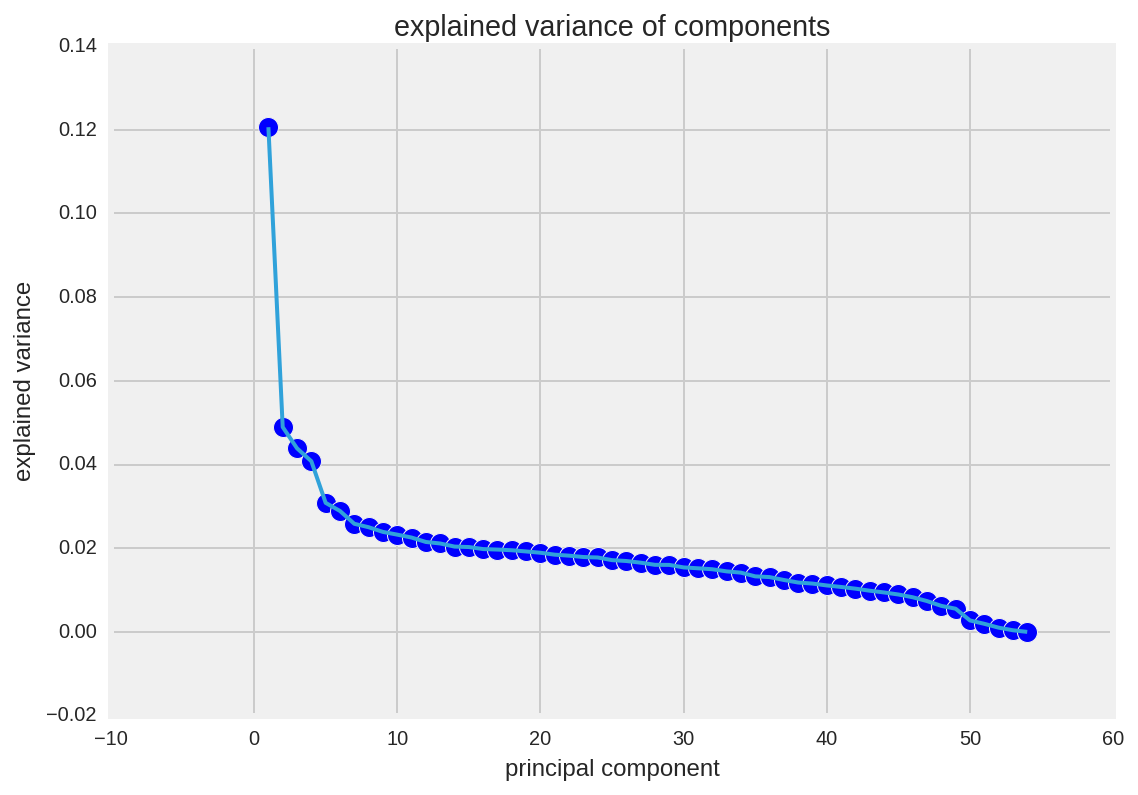

In [3]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1, soccer_pcs.shape[1]+1), soccer_pca.explained_variance_ratio_, lw=2)
ax.scatter(range(1, soccer_pcs.shape[1]+1), soccer_pca.explained_variance_ratio_, s=100)
ax.set_title('explained variance of components')
ax.set_xlabel('principal component')
ax.set_ylabel('explained variance')
plt.show()

In [18]:
comp_df = pd.DataFrame()
components = []
columns = []
for col, comp in zip(X.columns, soccer_pca.components_[0]):
    if comp>0:
        components.append(comp)
        columns.append(col)
comp_df['Variable'] = columns
comp_df['PCA_Comps'] = components
comp_df.sort_values('PCA_Comps',ascending=False)

,Variable,PCA_Comps
1,away_shots,0.307251
24,away_possession,0.303829
0,away_corners,0.233834
15,away_shoton_other,0.233741
23,away_crosses,0.216139
2,away_shots_target,0.214013
20,away_shotoff_other,0.203951
16,away_shoton_bigchance,0.102796
21,away_shotoff_bigchance,0.094786
11,away_goal_other,0.089585


In [14]:
for col, comp in zip(X.columns, soccer_pca.components_[1]):
    print col, comp

away_corners -0.0729626893391
away_fouls 0.07954813724
away_shots -0.123933652933
away_shots_target -0.236055378167
away_yellow_cards 0.0253738032585
away_red_cards 0.0131148041759
home_corners -0.0991506993416
home_fouls 0.128709257168
home_red_cards 0.0172243751844
home_yellow_cards 0.037198095471
home_shots -0.133557474874
home_shots_target -0.191182620811
half_time_result 0.0804087222672
Capacity 0.0551387139647
temp (F) 0.426834165511
dew (F) 0.423629429589
humidity 0.207251622932
wind direction 0.268237718076
wind speed (mph) 0.246393972458
visibility (mi) 0.33030803369
home_goal_headers 0.0045512257297
home_goal_freekicks 0.0299612813051
home_goal_volleys -0.0299877294863
home_goal_other 0.00889714830053
away_goal_headers -0.0435530131716
away_goal_freekicks 0.0418583729806
away_goal_volleys -0.0165428890395
away_goal_other -0.0661827530625
home_shoton_headers -0.0959421536646
home_shoton_freekicks -0.0279105557592
home_shoton_volleys -0.0664273743903
home_shoton_other -0.113527

In [5]:
X.columns

Index([u'away_corners', u'away_fouls', u'away_shots', u'away_shots_target',
       u'away_yellow_cards', u'away_red_cards', u'home_corners', u'home_fouls',
       u'home_red_cards', u'home_yellow_cards', u'home_shots',
       u'home_shots_target', u'half_time_result', u'Capacity', u'temp (F)',
       u'dew (F)', u'humidity', u'wind direction', u'wind speed (mph)',
       u'visibility (mi)', u'home_goal_headers', u'home_goal_freekicks',
       u'home_goal_volleys', u'home_goal_other', u'away_goal_headers',
       u'away_goal_freekicks', u'away_goal_volleys', u'away_goal_other',
       u'home_shoton_headers', u'home_shoton_freekicks',
       u'home_shoton_volleys', u'home_shoton_other', u'home_shoton_bigchance',
       u'away_shoton_headers', u'away_shoton_freekicks',
       u'away_shoton_volleys', u'away_shoton_other', u'away_shoton_bigchance',
       u'home_shotoff_headers', u'home_shotoff_freekicks',
       u'home_shotoff_volleys', u'home_shotoff_other',
       u'home_shotoff_bigchanc

In [4]:
def dbscan_gower(df,eps=range(1,20),min_samples=range(1,10)):
    clusters_info = []
    for i in eps:
        for j in min_samples:
            db = DBSCAN(eps=i,min_samples=j,metric='euclidean').fit(df)
            labels = db.labels_
            try:
                n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
                print n_clusters
            except:
                pass

dbscan_gower(soccer_pcs[['PC1','PC2','PC3']])

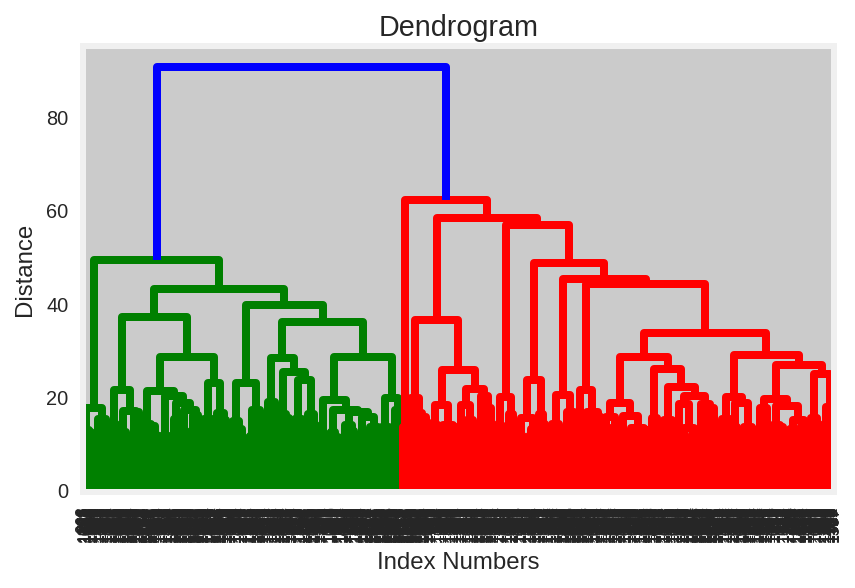

0.208517286206


In [6]:
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    c, coph_dists = cophenet(Z, pdist(X))
    
    # plotting
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    print c
    
plot_dendogram(soccer_pcs)

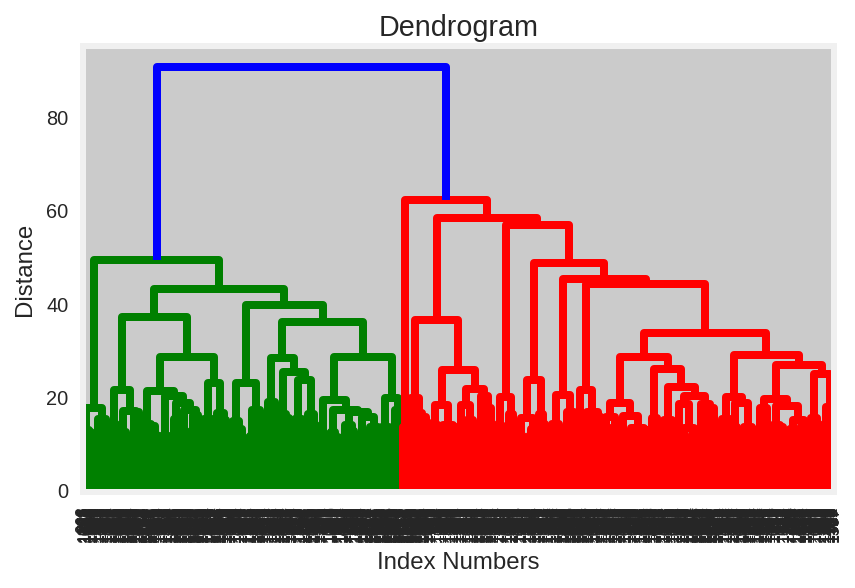

0.208517286206


In [8]:
plot_dendogram(pd.DataFrame(norm_data))

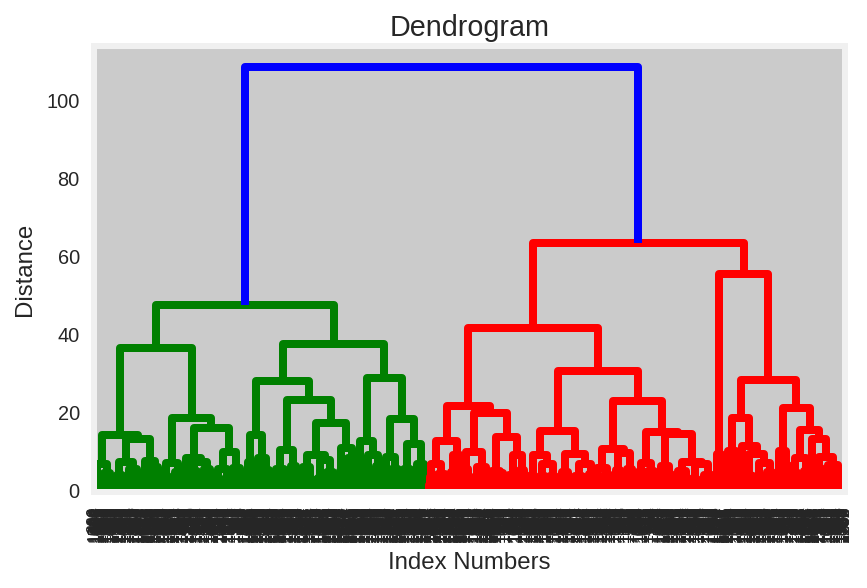

0.400146182694


In [9]:
plot_dendogram(soccer_pcs[['PC1','PC2','PC3','PC4']])

In [12]:
def clusters_array(df,max_dist):
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    clusters = fcluster(Z, max_dist, criterion='distance')
    return clusters

clusters = clusters_array(soccer_pcs[['PC1','PC2','PC3','PC4']],60)
soccer_pcs['cluster'] = clusters
print soccer_pcs.groupby('cluster').count().reset_index()['PC1']
soccer_pcs.groupby('cluster').mean().reset_index().T

0    725
1    622
2    279
Name: PC1, dtype: int64


,0,1,2
cluster,1.000000e+00,2.000000e+00,3.000000e+00
PC1,-2.107288e+00,9.096494e-01,3.447964e+00
PC2,-4.121955e-02,4.867980e-01,-9.781513e-01
PC3,-2.782430e-01,6.614458e-01,-7.515881e-01
PC4,1.579790e-01,-1.765869e-01,-1.683773e-02
PC5,-9.070547e-03,7.445315e-02,-1.424148e-01
PC6,4.767119e-02,-3.100747e-02,-5.474898e-02
PC7,2.701293e-02,-5.315536e-02,4.830919e-02
PC8,3.062222e-03,-3.887537e-02,7.871100e-02
PC9,6.016123e-02,-4.051597e-02,-6.600701e-02
